# Microsoft Corporation MSFT Stock predication using LSTM by Deepak Pardhi


## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import MinMaxScaler

## data from Microsoft Corporation MSFT

In [3]:
df = pd.read_csv('E:/Users/Lenovo/Desktop/jupiter/MSFT.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9396.000000,9396.000000,9396.000000,9396.000000,9396.000000,9.396000e+03
mean,48.879452,49.408400,48.343449,48.895312,43.501947,5.777479e+07
std,71.612333,72.359904,70.842825,71.643708,71.692541,3.821288e+07
min,0.088542,0.092014,0.088542,0.090278,0.056201,2.304000e+06
25%,5.373047,5.468750,5.304688,5.390625,3.355866,3.349765e+07
50%,27.070000,27.372501,26.850000,27.110001,19.065521,5.097020e+07
75%,43.822501,44.250000,43.202500,43.872500,33.685956,7.156198e+07
max,351.320007,351.470001,342.200012,348.100006,348.100006,1.031789e+09


## Data Analysis and Mining 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9396 non-null   object 
 1   Open       9396 non-null   float64
 2   High       9396 non-null   float64
 3   Low        9396 non-null   float64
 4   Close      9396 non-null   float64
 5   Adj Close  9396 non-null   float64
 6   Volume     9396 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 514.0+ KB


In [7]:
df = df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9391,2023-06-16,342.329987
9392,2023-06-20,338.049988
9393,2023-06-21,333.559998
9394,2023-06-22,339.709991


In [8]:
import datetime

In [9]:
 
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int (split[0]), int (split[1]), int (split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [10]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9391   2023-06-16
9392   2023-06-20
9393   2023-06-21
9394   2023-06-22
9395   2023-06-23
Name: Date, Length: 9396, dtype: datetime64[ns]

In [11]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9391,2023-06-16,342.329987
9392,2023-06-20,338.049988
9393,2023-06-21,333.559998
9394,2023-06-22,339.709991


In [12]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-06-16,342.329987
2023-06-20,338.049988
2023-06-21,333.559998


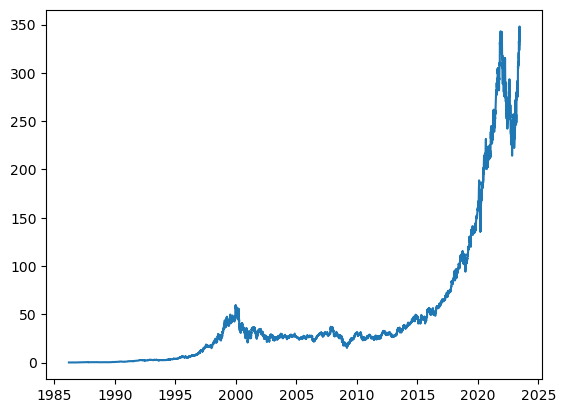

In [13]:

plt.plot(df.index,df['Close'])

In [14]:
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-06-16,342.329987
2023-06-20,338.049988
2023-06-21,333.559998


## Split data and find target date and data

In [15]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-18'
windowed_df = df_to_windowed_df(df, 
                                '1986-03-18', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-03-18,0.097222,0.100694,0.102431,0.099826
1,1986-03-19,0.100694,0.102431,0.099826,0.098090
2,1986-03-20,0.102431,0.099826,0.098090,0.095486
3,1986-03-21,0.099826,0.098090,0.095486,0.092882
4,1986-03-24,0.098090,0.095486,0.092882,0.090278
...,...,...,...,...,...
9074,2022-03-17,276.440002,287.149994,294.390015,295.220001
9075,2022-03-18,287.149994,294.390015,295.220001,300.429993
9076,2022-03-21,294.390015,295.220001,300.429993,299.160004
9077,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [16]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:,0]
    
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape(len(dates), middle_matrix.shape[1], 1)
    
    Y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)
dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9079,), (9079, 3, 1), (9079,))

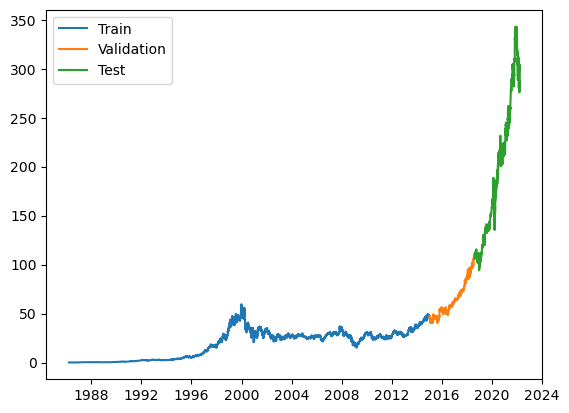

In [17]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])



## fit and Perform TensorFlow Model ( LSTM ) on Data

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
227/227 [==============================] - 13s 18ms/step - loss: 81.0187 - mean_absolute_error: 3.9344 - val_loss: 515.1852 - val_mean_absolute_error: 15.3771
Epoch 2/100
227/227 [==============================] - 2s 8ms/step - loss: 0.3768 - mean_absolute_error: 0.3304 - val_loss: 401.8354 - val_mean_absolute_error: 12.7783
Epoch 3/100
227/227 [==============================] - 2s 8ms/step - loss: 0.3399 - mean_absolute_error: 0.3360 - val_loss: 356.2984 - val_mean_absolute_error: 11.8269
Epoch 4/100
227/227 [==============================] - 2s 8ms/step - loss: 0.3136 - mean_absolute_error: 0.3236 - val_loss: 327.3710 - val_mean_absolute_error: 10.9808
Epoch 5/100
227/227 [==============================] - 2s 8ms/step - loss: 0.3159 - mean_absolute_error: 0.3289 - val_loss: 317.6384 - val_mean_absolute_error: 10.8164
Epoch 6/100
227/227 [==============================] - 2s 8ms/step - loss: 0.3087 - mean_absolute_error: 0.3181 - val_loss: 299.5397 - val_mean_absolute_erro

## test data and find Loss and MAE

In [19]:
# Assuming you have already trained the model and have the test data (X_test, y_test)

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test, y_test)

# Print the loss and mean absolute error (MAE)
print("Loss:", loss)
print("Mean Absolute Error (MAE):", mae)


29/29 [==============================] - 0s 7ms/step - loss: 23740.9648 - mean_absolute_error: 135.5171
Loss: 23740.96484375
Mean Absolute Error (MAE): 135.51705932617188


227/227 [==============================] - 2s 4ms/step


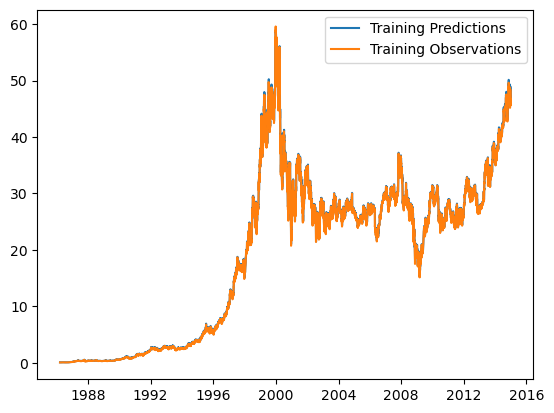

In [20]:
train_predications = model.predict(X_train).flatten()

plt.plot(dates_train, train_predications)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

29/29 [==============================] - 0s 5ms/step


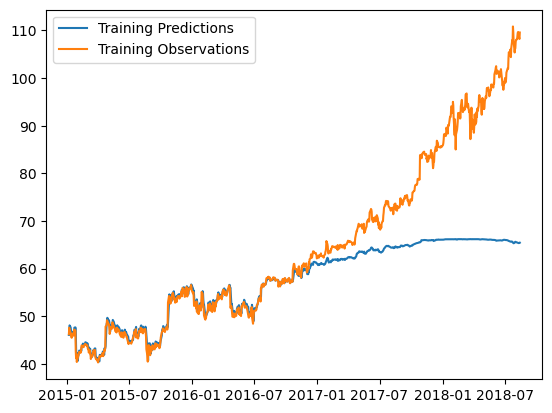

In [21]:
val_predications = model.predict(X_val).flatten()

plt.plot(dates_val, val_predications)
plt.plot(dates_val, y_val)
plt.legend(['Training Predictions', 'Training Observations'])

29/29 [==============================] - 0s 5ms/step


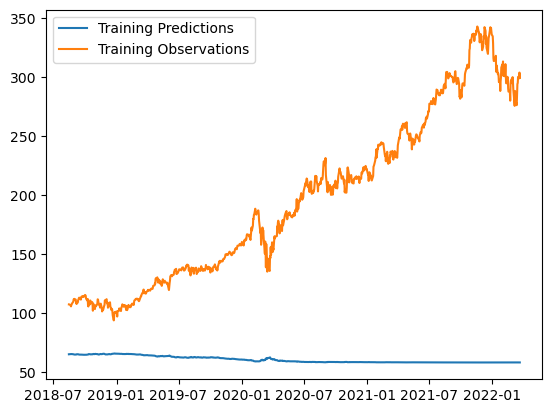

In [22]:
test_predications = model.predict(X_test).flatten()

plt.plot(dates_test, test_predications)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 'Training Observations'])

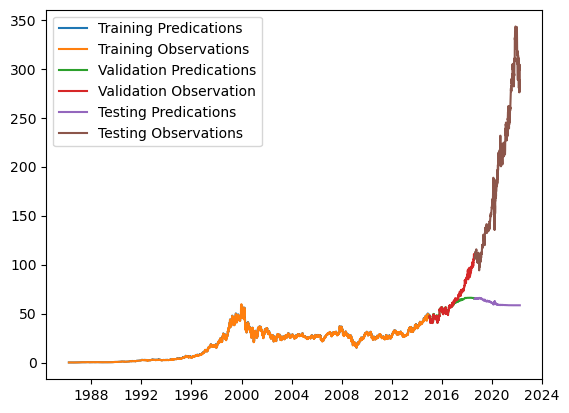

In [23]:
plt.plot(dates_train, train_predications)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predications)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predications)
plt.plot(dates_test, y_test)
plt.legend(['Training Predications',
            'Training Observations',
            'Validation Predications',
            'Validation Observation',
            'Testing Predications',
            'Testing Observations'])

In [24]:
from copy import deepcopy

recursive_predictions = []
recursive_dates =np.concatenate([dates_val,dates_val])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 36ms/step


## Final Visualization with Predications

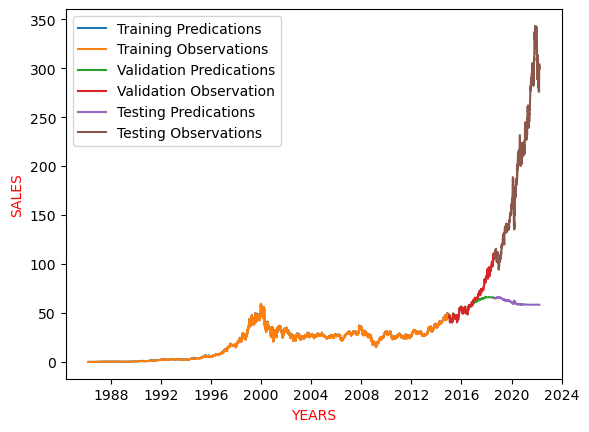

In [25]:
plt.plot(dates_train, train_predications)
plt.xlabel("YEARS",color="r")
plt.ylabel("SALES",color="r")
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predications)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predications)
plt.plot(dates_test, y_test)
plt.legend(['Training Predications',
            'Training Observations',
            'Validation Predications',
            'Validation Observation',
            'Testing Predications',
            'Testing Observations'])